In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

In [2]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI_Collection_and_Loss_Reverse_Forecast\modelling\nasabah\clustering\data\data_for_classification.csv")
df.sample(5)

,Unnamed: 0,net_income,loan_amount,amount_of_late,late_payment_amount,credit_score,arrears_amounts,loss_reverse,credit_risk
4041,4041,10500000.00,57666667.00,68.00,3.00,366.00,2.00,28833333.00,Tertagih dengan resiko tinggi
820,820,13000000.00,61833333.00,0.00,0.00,466.00,0.00,0.00,Tertagih dengan resiko rendah
4004,4004,17500000.00,61833333.00,60.00,3.00,590.00,1.00,15458333.00,Tertagih dengan resiko rendah
4972,4972,11700000.00,58666667.00,154.00,8.00,250.00,3.00,44000000.00,Tertagih dengan resiko tinggi
2332,2332,20000000.00,68500000.00,30.00,2.00,690.00,1.00,17125000.00,Tertagih dengan resiko rendah


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           5000 non-null   int64  
 1   net_income           5000 non-null   float64
 2   loan_amount          5000 non-null   float64
 3   amount_of_late       5000 non-null   float64
 4   late_payment_amount  5000 non-null   float64
 5   credit_score         5000 non-null   float64
 6   arrears_amounts      5000 non-null   float64
 7   loss_reverse         5000 non-null   float64
 8   credit_risk          5000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 351.7+ KB


In [4]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = df[i].astype("category")

df.drop(["Unnamed: 0", "loss_reverse"], axis=1, inplace=True)

In [5]:
columns = {}
for i in df.columns:
    if df[i].dtype == "category" or df[i].dtype == "object":
        columns[i] = LabelEncoder().fit(df[i])
        df[i] = columns[i].transform(df[i])
             
scaler = RobustScaler().fit(df[[i for i in df.columns if i not in columns]])
df2 = pd.DataFrame(scaler.transform(df[[i for i in df.columns if i not in columns]]), columns=df[[i for i in df.columns if i not in columns]].columns)
for i in columns:
    df2[i] = df[i]
df2.head(5)

,net_income,loan_amount,amount_of_late,late_payment_amount,credit_score,arrears_amounts,credit_risk
0,0.00,0.19,-0.80,-0.60,1.59,-1.00,0
1,0.27,0.98,-0.41,-0.20,0.37,0.00,0
2,0.27,-0.11,-0.83,-0.80,0.84,-1.00,0
3,0.00,0.06,0.03,0.20,0.85,0.00,0
4,-0.91,-0.41,-0.64,-0.40,0.22,-1.00,0


In [6]:
X = df2.drop("credit_risk", axis=1)
y = df2["credit_risk"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
reg = LazyClassifier(verbose=0, ignore_warnings=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
models

  0%|          | 0/29 [00:00<?, ?it/s]

 93%|█████████▎| 27/29 [00:05<00:00,  7.54it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000972 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 790
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 6
[LightGBM] [Info] Start training from score -0.503354
[LightGBM] [Info] Start training from score -1.272966
[LightGBM] [Info] Start training from score -2.590267
[LightGBM] [Info] Start training from score -3.206453
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

100%|██████████| 29/29 [00:06<00:00,  4.23it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.99,0.99,None,0.99,1.26
RandomForestClassifier,0.99,0.99,None,0.99,0.71
BaggingClassifier,0.99,0.99,None,0.99,0.14
ExtraTreesClassifier,0.99,0.99,None,0.99,0.31
LogisticRegression,0.99,0.99,None,0.99,0.11
DecisionTreeClassifier,0.98,0.99,None,0.98,0.03
XGBClassifier,0.99,0.99,None,0.99,0.48
LabelPropagation,0.99,0.99,None,0.99,0.80
LabelSpreading,0.99,0.99,None,0.99,1.58


In [7]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

ada = AdaBoostClassifier()
forest = RandomForestClassifier()
bagging = BaggingClassifier()
quad = QuadraticDiscriminantAnalysis()
percept = Perceptron()
nb = GaussianNB()
xgb = XGBClassifier()

ada.fit(X_train, y_train)
forest.fit(X_train, y_train)
bagging.fit(X_train, y_train)
quad.fit(X_train, y_train)
percept.fit(X_train, y_train)
nb.fit(X_train, y_train)
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [8]:
def evaluate_performa(X_test, y_test, model1, model2, model3, model4, model5, model6, model7):
    rate = [0, 0, 0, 0, 0, 0, 0]
    #difference = [0, 0, 0, 0, 0]

    X_test = X_test.reset_index(drop=True)
    for i, _ in X_test.iterrows():
        X = np.array(X_test.iloc[[i]])
        y = np.array(y_test.iloc[[i]])
        difference = [0, 0, 0, 0, 0, 0, 0]
        difference[0] = abs(model1.predict(X) - y[0])
        difference[1] = abs(model2.predict(X) - y[0])
        difference[2] = abs(model3.predict(X) - y[0])
        difference[3] = abs(model4.predict(X) - y[0])
        difference[4] = abs(model5.predict(X) - y[0])
        difference[5] = abs(model6.predict(X) - y[0])
        difference[6] = abs(model7.predict(X) - y[0])
        
        print(difference)

        a = int(np.argmin(difference))
        print(a)
        for i in range(len(difference)):
            if difference[a] == difference[i]:
                rate[i] += 1
    
    a = f"Best model : {rate.index(max(rate))+1}"
    return a, rate

In [9]:
a = evaluate_performa(X_test, y_test, ada, forest, bagging, quad, percept, nb, xgb)
a

[array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0], dtype=int64)]
0
[array([0]), array([0]), array([0]), array([0]), array([0]), array([1]), array([0], dtype=int64)]
0
[array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0], dtype=int64)]
0
[array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0], dtype=int64)]
0
[array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0], dtype=int64)]
0
[array([0]), array([0]), array([0]), array([0]), array([2]), array([1]), array([0], dtype=int64)]
0
[array([0]), array([0]), array([0]), array([1]), array([0]), array([1]), array([0], dtype=int64)]
0
[array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0], dtype=int64)]
0
[array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0], dtype=int64)]
0
[array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0], dtype=int64)]
0


('Best model : 7', [961, 991, 988, 963, 886, 923, 992])

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
name = ["ExtraTreeRegressor", "RandomForest", "XGB", "GradientBoosting", "BaggingRegressor"]
estimators = [forest, bagging, xgb, quad, nb]
accuracy = [accuracy_score(y_test, i.predict(X_test)) for i in estimators]
precision = [precision_score(y_test, i.predict(X_test), average="micro") for i in estimators]
recall = [recall_score(y_test, i.predict(X_test), average="micro") for i in estimators]
f1score = [f1_score(y_test, i.predict(X_test), average="micro") for i in estimators]

estimate = pd.DataFrame({
    "name": name,
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1score": f1score,
}
)
estimate

,name,accuracy,precision,recall,f1score
0,ExtraTreeRegressor,0.99,0.99,0.99,0.99
1,RandomForest,0.99,0.99,0.99,0.99
2,XGB,0.99,0.99,0.99,0.99
3,GradientBoosting,0.96,0.96,0.96,0.96
4,BaggingRegressor,0.92,0.92,0.92,0.92


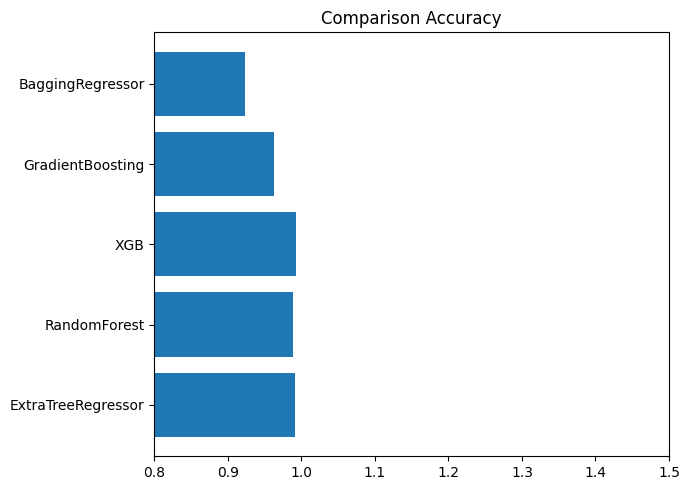

In [11]:
plt.figure(figsize=(7, 5))
plt.barh(estimate.name, estimate.accuracy)
plt.title("Comparison Accuracy")
plt.xlim(0.8, 1.5)
plt.tight_layout()
plt.show()